In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
import sqlite3

con = sqlite3.connect("../db.sqlite3")

query = (
    "SELECT restaurant_orderitem.*, restaurant_product.name, restaurant_product.price, restaurant_order.datetime FROM restaurant_orderitem INNER JOIN restaurant_product,restaurant_order ON restaurant_orderitem.product_id = restaurant_product.id AND restaurant_orderitem.product_id = restaurant_order.id"
)

df = pd.read_sql(query, con)
df.to_csv("restaurant_data.csv", index=False)
con.close()

In [3]:
df.head()

,id,quantity,order_id,product_id,name,price,datetime
0,1,2,1,6,Plain Papadum,0.80,2019-08-03 19:42:00
1,2,1,1,240,King Prawn Balti,12.95,2019-06-22 17:49:00
2,3,1,1,19,Garlic Naan,2.95,2019-08-03 18:00:00
3,4,1,1,36,Mushroom Rice,3.95,2019-08-02 11:35:00
4,5,1,1,111,Paneer Tikka Masala,8.95,2019-07-21 18:55:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          74818 non-null  int64  
 1   quantity    74818 non-null  int64  
 2   order_id    74818 non-null  int64  
 3   product_id  74818 non-null  int64  
 4   name        74818 non-null  object 
 5   price       74818 non-null  float64
 6   datetime    74818 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.0+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [5]:
top_ten = df.groupby("name")["quantity"].sum().sort_values(ascending=False)[:10]
top_ten

name
Plain Papadum           10648
Pilau Rice               6367
Plain Naan               4983
Garlic Naan              3318
Plain Rice               2964
Onion Bhajee             2749
Mango Chutney            2504
Chicken Tikka Masala     2473
Chapati                  1935
Mint Sauce               1840
Name: quantity, dtype: int64

In [6]:
# custom format for  displaying percent(value)

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return "{:.1f}%\n({v:d})".format(pct, v=val)
        return my_format

<Axes: title={'center': 'Top ten selling products from menu by quantity'}>

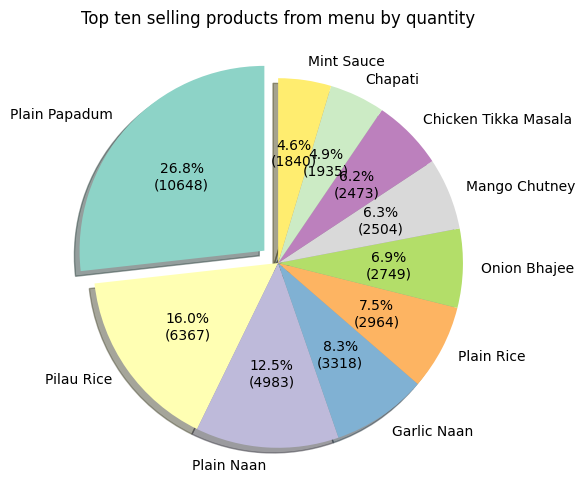

In [7]:
top_ten.plot.pie(
    y="quantity", 
    figsize=(12,6),
    ylabel="",
    title="Top ten selling products from menu by quantity",
    startangle=90,
    explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    autopct=autopct_format(top_ten),
    shadow=True,
    cmap="Set3"
)

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [8]:
df["item_price"] = df["quantity"] * df["price"]
df

,id,quantity,order_id,product_id,name,price,datetime,item_price
0,1,2,1,6,Plain Papadum,0.80,2019-08-03 19:42:00,1.60
1,2,1,1,240,King Prawn Balti,12.95,2019-06-22 17:49:00,12.95
2,3,1,1,19,Garlic Naan,2.95,2019-08-03 18:00:00,2.95
3,4,1,1,36,Mushroom Rice,3.95,2019-08-02 11:35:00,3.95
4,5,1,1,111,Paneer Tikka Masala,8.95,2019-07-21 18:55:00,8.95
...,...,...,...,...,...,...,...,...
74813,74814,2,3255,247,House Red wine 75cl,17.95,2019-06-21 18:24:00,35.90
74814,74815,2,12905,247,House Red wine 75cl,17.95,2019-06-21 18:24:00,35.90
74815,74816,2,3272,247,House Red wine 75cl,17.95,2019-06-21 18:24:00,35.90
74816,74817,1,11404,248,House white wine 75cl,17.95,2019-06-21 17:35:00,17.95


In [9]:
top_ten_by_income = df.groupby("name")["item_price"].sum().sort_values(ascending=False)[:10]
top_ten_by_income

name
Chicken Tikka Masala    22133.35
Pilau Rice              18782.65
Plain Naan              12955.80
Korma                   12261.50
Bombay Aloo             10894.45
Onion Bhajee            10858.55
Butter Chicken          10626.60
Garlic Naan              9788.10
Korma - Chicken          9764.45
Plain Rice               8743.80
Name: item_price, dtype: float64

<Axes: title={'center': 'Top ten selling products from menu by gross income'}>

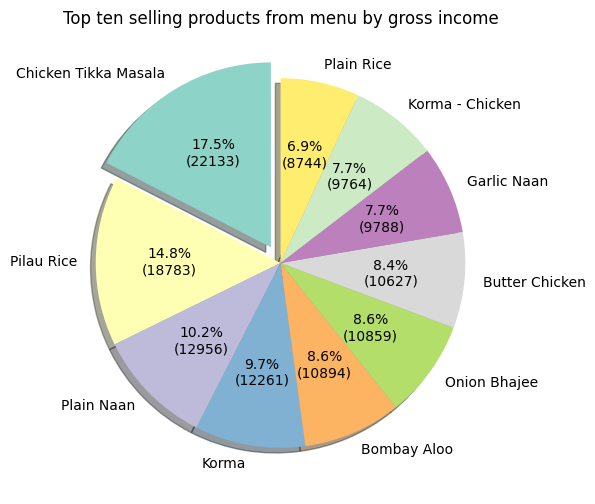

In [10]:
top_ten_by_income.plot.pie(
    figsize=(12,6),
    ylabel="",
    title="Top ten selling products from menu by gross income",
    startangle=90,
    explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    autopct=autopct_format(top_ten_by_income),
    shadow=True,
    cmap="Set3"
)

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [17]:
df["date"] = pd.to_datetime(df["datetime"], yearfirst=True, format="%Y-%m-%d %H:%M:%S")
df = df.drop(["datetime"], axis=1)

KeyError: 'datetime'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          74818 non-null  int64         
 1   quantity    74818 non-null  int64         
 2   order_id    74818 non-null  int64         
 3   product_id  74818 non-null  int64         
 4   name        74818 non-null  object        
 5   price       74818 non-null  float64       
 6   item_price  74818 non-null  float64       
 7   date        74818 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 4.6+ MB


In [25]:
income_by_hour = df.groupby(df["date"].dt.hour)["item_price"].sum()
income_by_hour.head()

date
11    6379.25
12     533.25
13     875.00
14    5770.35
16    3468.20
Name: item_price, dtype: float64

<Axes: title={'center': 'Total Income  by hour'}, xlabel='hour'>

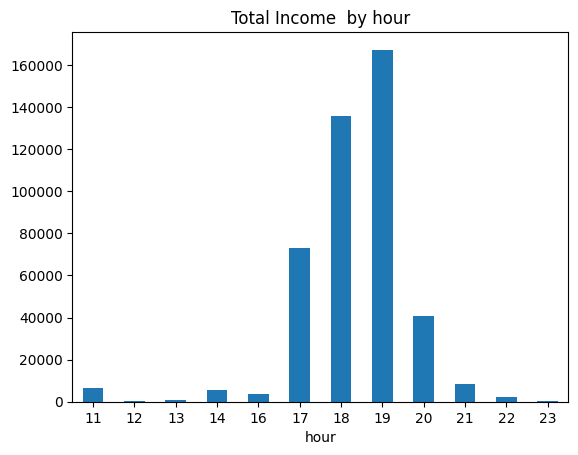

In [28]:
income_by_hour.plot.bar(
    xlabel="hour", 
    title="Total Income  by hour", 
    rot=0
)

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [37]:
income_by_day_of_week = df.groupby(df["date"].dt.dayofweek)["item_price"].sum()
income_by_day_of_week

date
0     32655.15
1     38401.05
2     31665.55
3     52570.95
4     91842.95
5    162376.90
6     35545.90
Name: item_price, dtype: float64

([<matplotlib.axis.XTick at 0x22d5bbea850>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

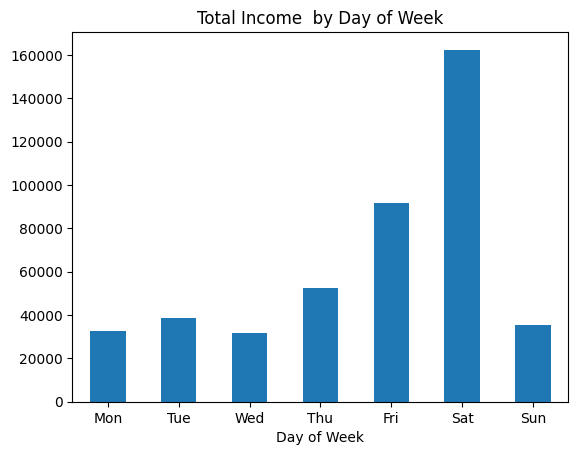

In [45]:
labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
income_by_day_of_week.plot.bar(
    xlabel="Day of Week",
    title="Total Income  by Day of Week", 
    rot=0
)
plt.xticks(income_by_day_of_week.index, labels)